In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import numpy as np
from collections.abc import MutableSequence

In [45]:
def removeNanRows(df:pd.DataFrame,columns:MutableSequence[str]):
    masks = []
    for column in columns:
        masks.append(~df[column].isna())
    return df[np.bitwise_and(*masks)]

Data:(Rows, Columns)
(180, 9)


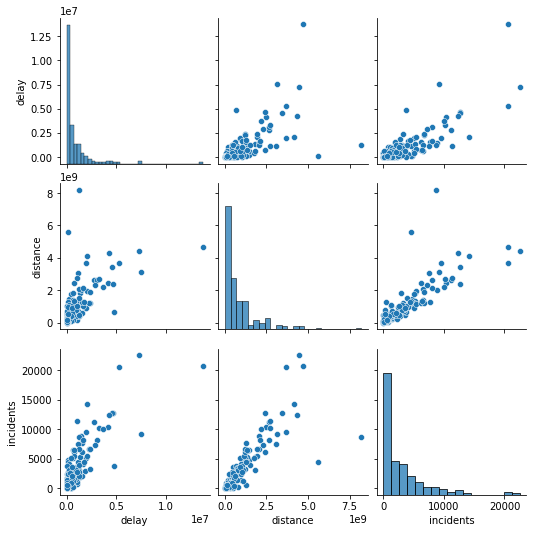

In [54]:
dat = pd.read_csv("caltrans.csv").replace(' -   ',np.nan)
print('Data:(Rows, Columns)')
print(dat.shape)
dat.head(5)


# df = dat[['route','suffix','county','rank','delay','distance','incidents','incidentsperday','incidentspermiles']]
dat = dat[['delay','distance','incidents']]
dat["incidents"]=pd.to_numeric(dat.incidents)
dat["delay"]=pd.to_numeric(dat.delay)
sns.pairplot(dat, kind="scatter")
plt.show()




 Correlation - Pearson Correlation Coefficient
              delay  distance  incidents
delay      1.000000  0.635663   0.817633
distance   0.635663  1.000000   0.829006
incidents  0.817633  0.829006   1.000000


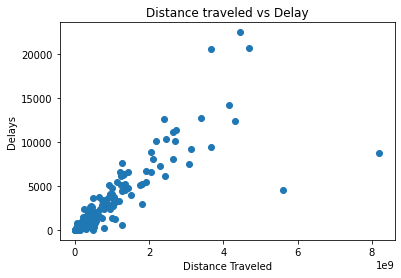

In [56]:
#pearson correlation coefficient
print('\n Correlation - Pearson Correlation Coefficient')
print(dat.corr())
plt.title('Distance traveled vs Delay')
nonan=removeNanRows(dat,["distance", "incidents"])
plt.scatter(nonan.distance,(nonan.incidents))
plt.xlabel('Distance Traveled')
plt.ylabel('Delays')
plt.show()



(26239.999999999993, 0.24132104545618874, 26080, array([[0.01219512, 0.01219512, 0.00609756, ..., 0.00609756, 0.00609756,
        0.00609756],
       [0.01219512, 0.01219512, 0.00609756, ..., 0.00609756, 0.00609756,
        0.00609756],
       [0.01219512, 0.01219512, 0.00609756, ..., 0.00609756, 0.00609756,
        0.00609756],
       ...,
       [0.01219512, 0.01219512, 0.00609756, ..., 0.00609756, 0.00609756,
        0.00609756],
       [0.01219512, 0.01219512, 0.00609756, ..., 0.00609756, 0.00609756,
        0.00609756],
       [0.01219512, 0.01219512, 0.00609756, ..., 0.00609756, 0.00609756,
        0.00609756]]))


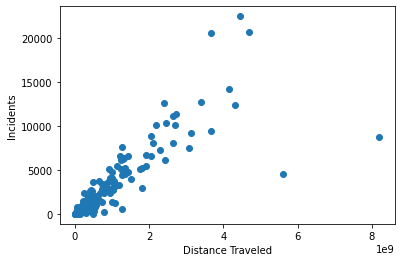

In [59]:
#CHI-square test confirmed vs suspect
pd.crosstab(dat.distance,dat.incidents )
print(chi2_contingency(pd.crosstab(dat.distance,dat.incidents)))
plt.scatter(dat.distance,dat.incidents)
plt.xlabel('Distance Traveled')
plt.ylabel('Incidents')
plt.show()


    

(28730.0, 0.23931588666494022, 28561, array([[0.00588235, 0.00588235, 0.00588235, ..., 0.00588235, 0.00588235,
        0.00588235],
       [0.00588235, 0.00588235, 0.00588235, ..., 0.00588235, 0.00588235,
        0.00588235],
       [0.00588235, 0.00588235, 0.00588235, ..., 0.00588235, 0.00588235,
        0.00588235],
       ...,
       [0.00588235, 0.00588235, 0.00588235, ..., 0.00588235, 0.00588235,
        0.00588235],
       [0.00588235, 0.00588235, 0.00588235, ..., 0.00588235, 0.00588235,
        0.00588235],
       [0.00588235, 0.00588235, 0.00588235, ..., 0.00588235, 0.00588235,
        0.00588235]]))


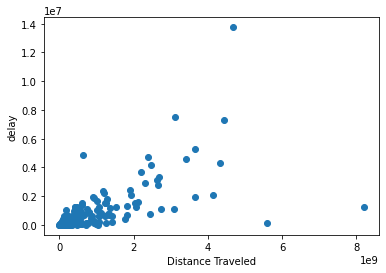

In [60]:
#CHI-square test confirmed vs ICU
print(chi2_contingency(pd.crosstab(dat.distance,dat.delay)))
plt.scatter(dat.distance,dat.delay)
plt.xlabel('Distance Traveled')
plt.ylabel('delay')
plt.show()



(24959.999999999993, 0.2413605277363867, 24804, array([[0.0125 , 0.0125 , 0.0125 , ..., 0.0125 , 0.0125 , 0.0125 ],
       [0.0125 , 0.0125 , 0.0125 , ..., 0.0125 , 0.0125 , 0.0125 ],
       [0.00625, 0.00625, 0.00625, ..., 0.00625, 0.00625, 0.00625],
       ...,
       [0.00625, 0.00625, 0.00625, ..., 0.00625, 0.00625, 0.00625],
       [0.00625, 0.00625, 0.00625, ..., 0.00625, 0.00625, 0.00625],
       [0.00625, 0.00625, 0.00625, ..., 0.00625, 0.00625, 0.00625]]))


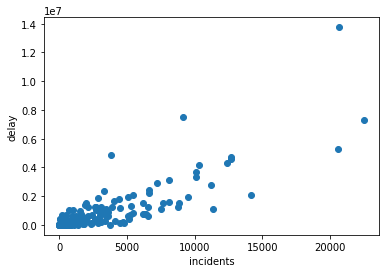

In [61]:
#CHI-square test confirmed vs ICU
print(chi2_contingency(pd.crosstab(dat.incidents,dat.delay)))
plt.scatter(dat.incidents,dat.delay)
plt.xlabel('incidents')
plt.ylabel('delay')
plt.show()